In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
df = pd.read_csv(r"C:\Users\mobin\DATASIENCE\ML PROJECTS\Multi Linear Regression\Cars.csv")

In [3]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
df = pd.DataFrame(df, columns=["HP","VOL","SP", "WT","MPG"])

In [5]:
df.isnull().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

In [6]:
df.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


In [7]:
df.corr(numeric_only = True)

,HP,VOL,SP,WT,MPG
HP,1.000000,0.077459,0.973848,0.076513,-0.725038
VOL,0.077459,1.000000,0.102170,0.999203,-0.529057
SP,0.973848,0.102170,1.000000,0.102439,-0.687125
WT,0.076513,0.999203,0.102439,1.000000,-0.526759
MPG,-0.725038,-0.529057,-0.687125,-0.526759,1.000000


C:\Users\mobin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


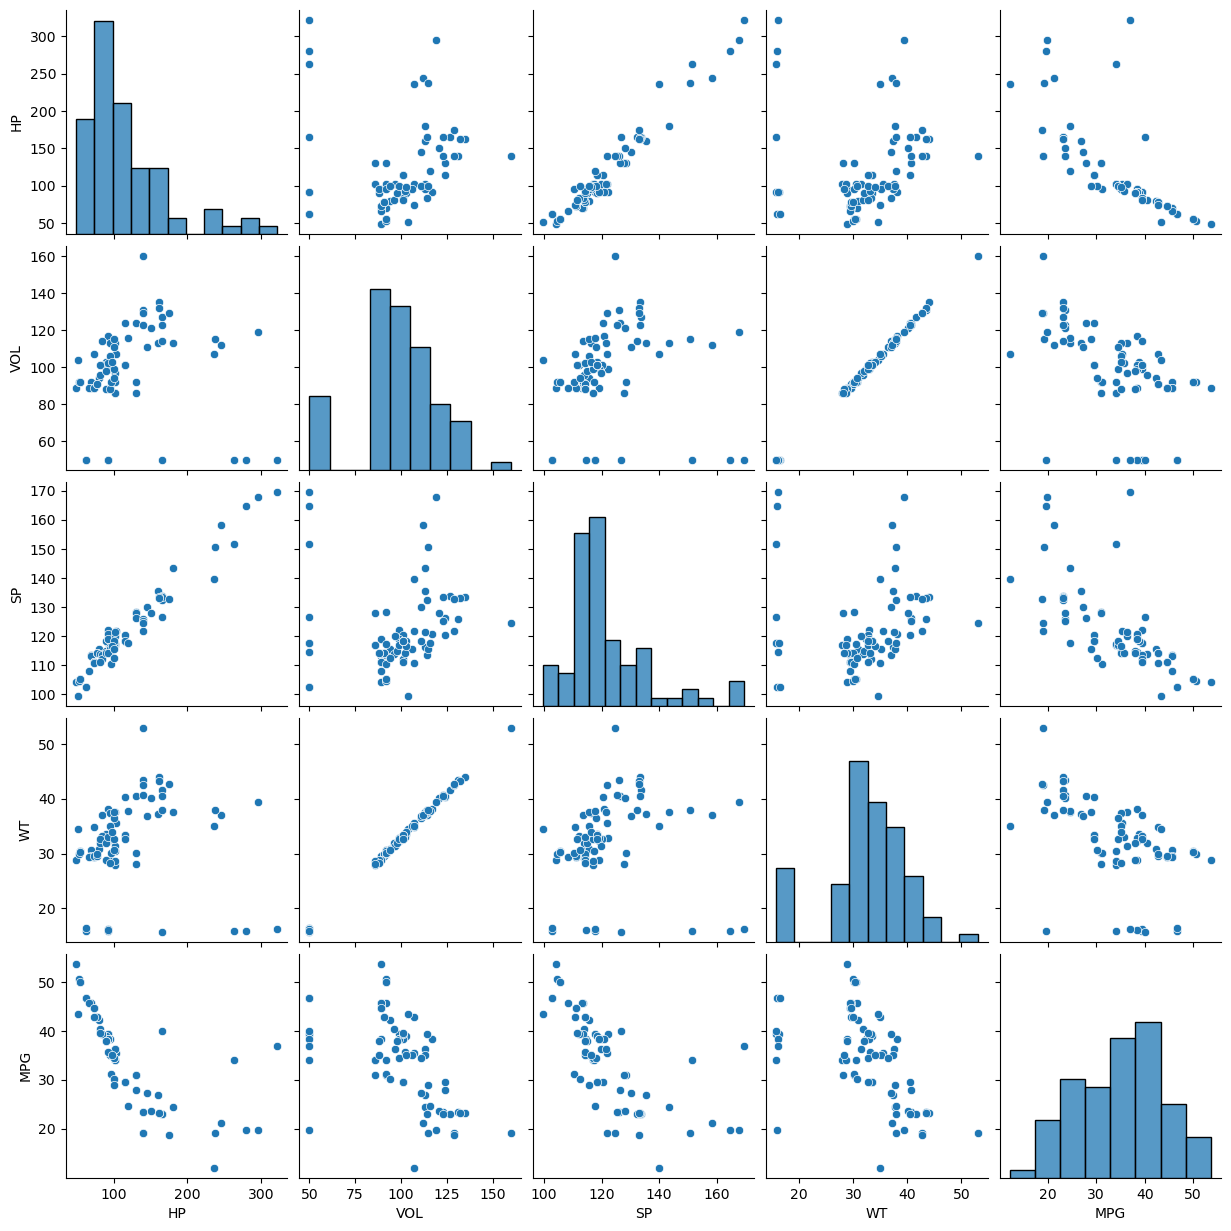

In [8]:
sns.pairplot(data = df)

In [9]:
model_1 = smf.ols('MPG~HP+SP+WT+VOL' , data = df).fit()

In [10]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           1.54e-23
Time:                        19:11:41   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Calculating Variance Inflation Factor(VIF)

In [11]:
rsq_hp = smf.ols('HP~SP+WT+VOL', data = df).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_sp = smf.ols('SP~HP+WT+VOL', data = df).fit().rsquared
vif_sp = 1/(1-rsq_sp)

rsq_wt = smf.ols('WT~SP+HP+VOL', data = df).fit().rsquared
vif_wt = 1/(1-rsq_wt)

rsq_vol = smf.ols('VOL~SP+WT+HP', data = df).fit().rsquared
vif_vol = 1/(1-rsq_vol)




In [12]:
d1 = {'Variables':['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


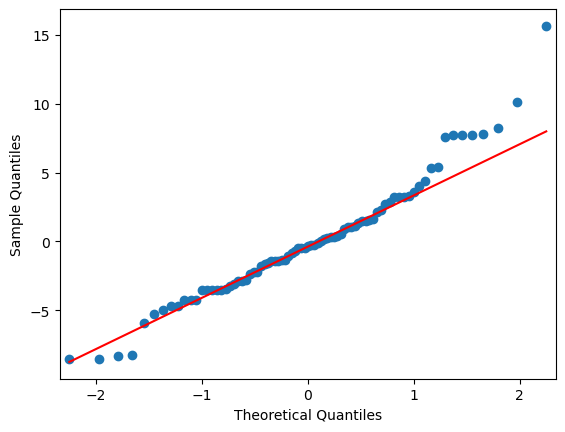

In [13]:
model_vol = smf.ols('MPG~HP+SP+VOL' , data = df).fit()
qqplot = sm.qqplot(model_vol.resid , line = 'q')

C:\Users\mobin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


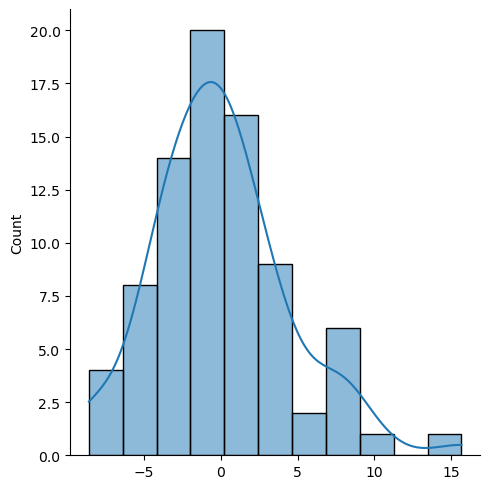

In [14]:
sns.displot(model_vol.resid , kde = True)

In [15]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

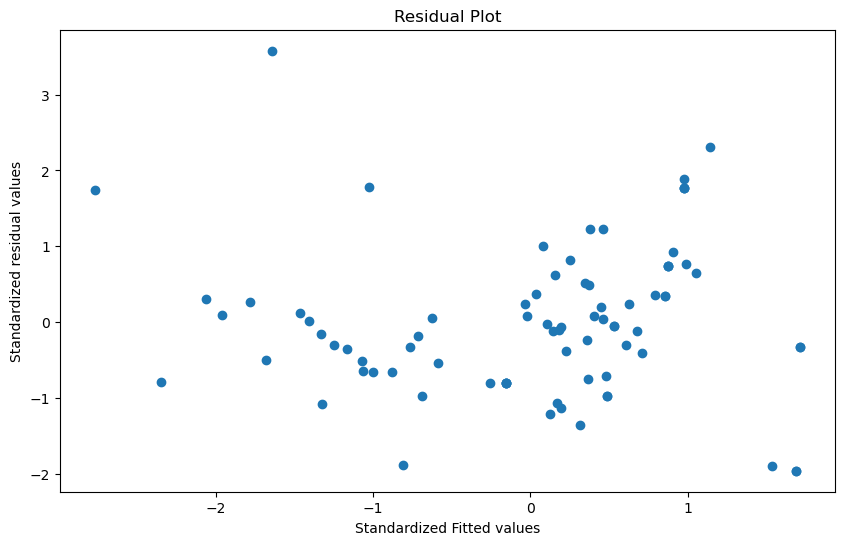

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(get_standardized_values(model_vol.fittedvalues),
            get_standardized_values(model_vol.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

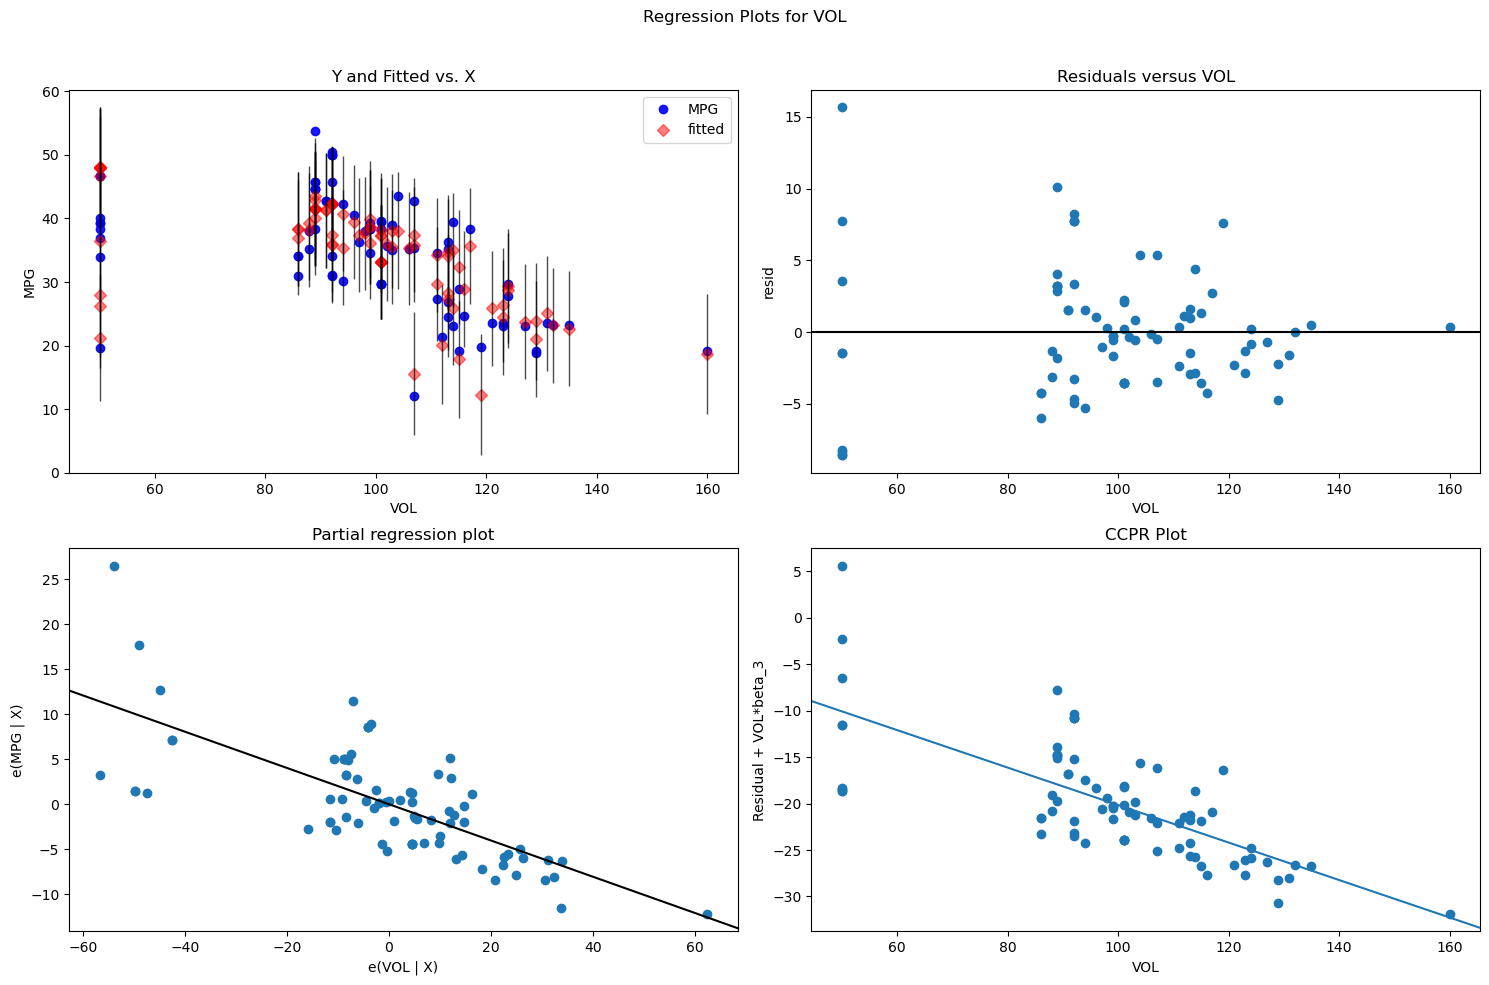

In [17]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model_vol, "VOL", fig=fig)
plt.show()

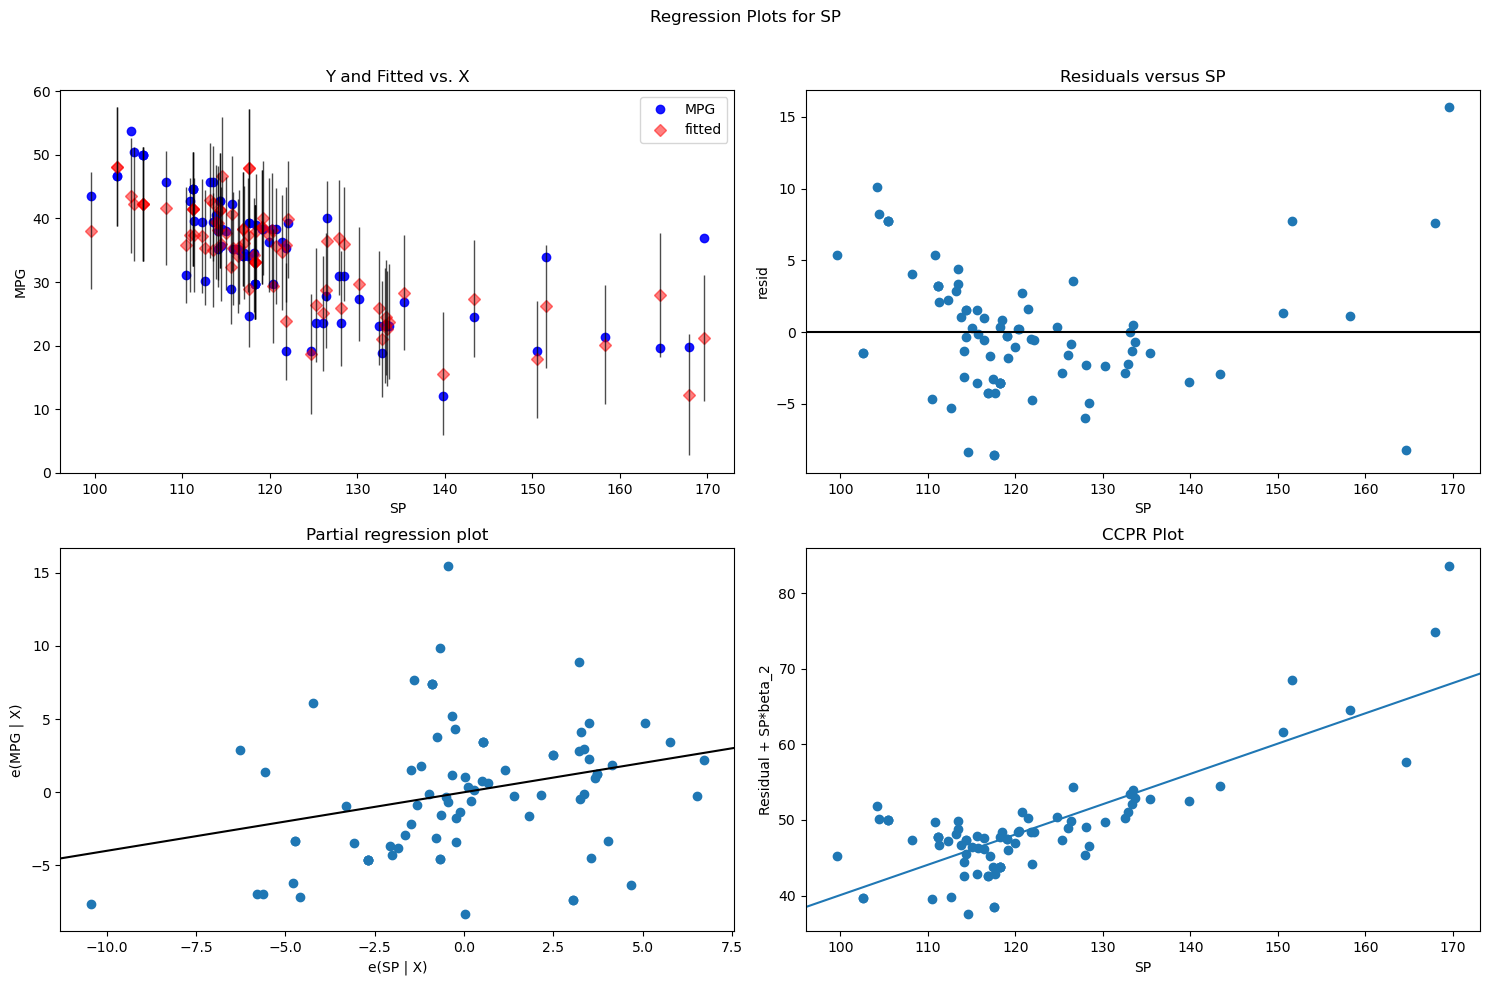

In [18]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model_vol, "SP", fig=fig)
plt.show()

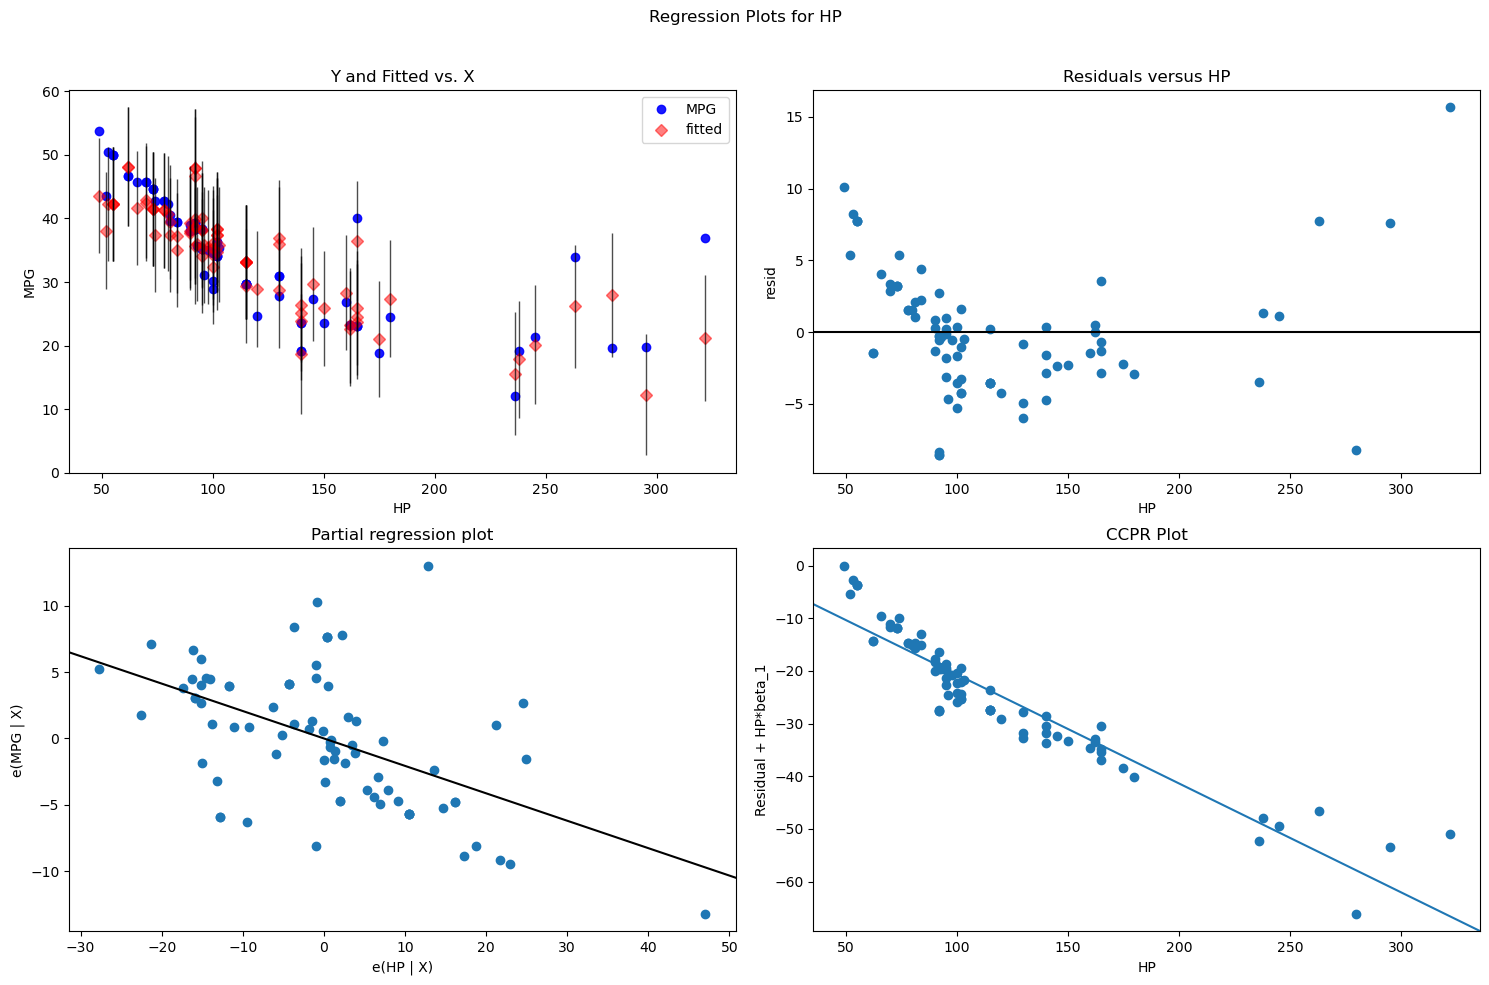

In [19]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model_vol, "HP", fig=fig)
plt.show()

# Model Deletion Diagnostics




## Detecting Influencers/Outliers

## Cook’s Distance

In [20]:
model_inf = model_vol.get_influence()
(C , _) = model_inf.cooks_distance

In [21]:
C

array([4.43781421e-02, 2.31439849e-02, 2.31439849e-02, 5.50743307e-03,
       2.84029117e-02, 3.89961849e-03, 2.31439849e-02, 3.39659293e-03,
       3.39659293e-03, 9.67532550e-04, 3.00465895e-03, 9.32152031e-02,
       2.65177317e-04, 3.00465895e-03, 5.41784561e-03, 3.00465895e-03,
       8.22731925e-04, 9.32152031e-02, 8.22731925e-04, 3.21833541e-04,
       2.70620733e-05, 8.34770054e-03, 1.83348025e-05, 2.72860299e-04,
       1.23307010e-03, 7.41312614e-02, 5.71759163e-03, 2.70620733e-05,
       3.33387970e-02, 9.21393948e-05, 5.93913831e-03, 1.23367282e-03,
       2.67864467e-04, 1.10555542e-03, 1.21312479e-03, 2.01774924e-05,
       4.19374936e-04, 4.18657710e-03, 4.18657710e-03, 1.12077324e-02,
       2.70424384e-04, 3.80042521e-06, 1.99290460e-03, 2.64674273e-03,
       2.22196543e-05, 4.76293133e-04, 2.58868946e-05, 4.92204073e-05,
       1.55796817e-02, 3.53143210e-03, 3.53143210e-03, 3.53143210e-03,
       2.30754944e-05, 1.04055062e-02, 1.07199598e-03, 2.89811901e-04,
      

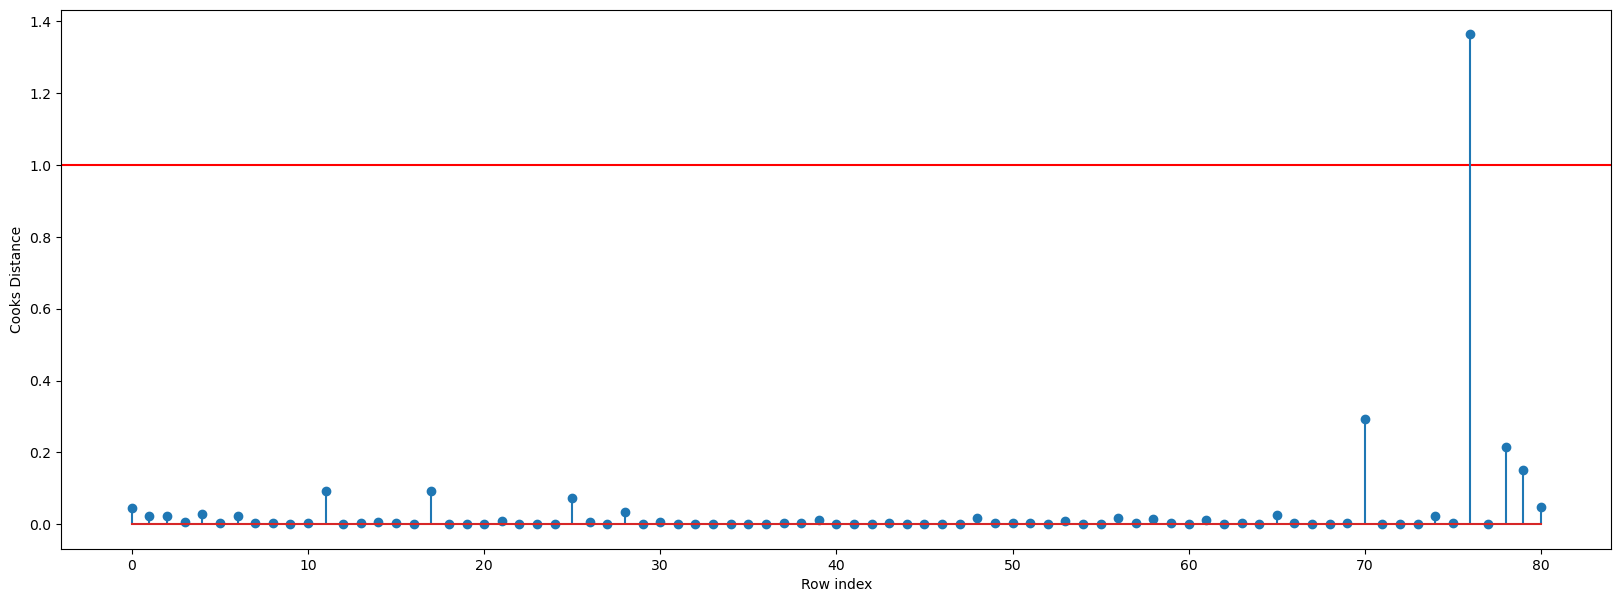

In [22]:
fig = plt.subplots(figsize=(20, 7))
plt.axhline(y=1, color='r', linestyle='-')
plt.stem(np.arange(len(df)), np.round(C, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.plot(1)
plt.show()

In [23]:
(np.argmax(C),np.max(C))

(76, 1.3641743869103389)

In [24]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.2222222222222222

<Figure size 1500x800 with 0 Axes>

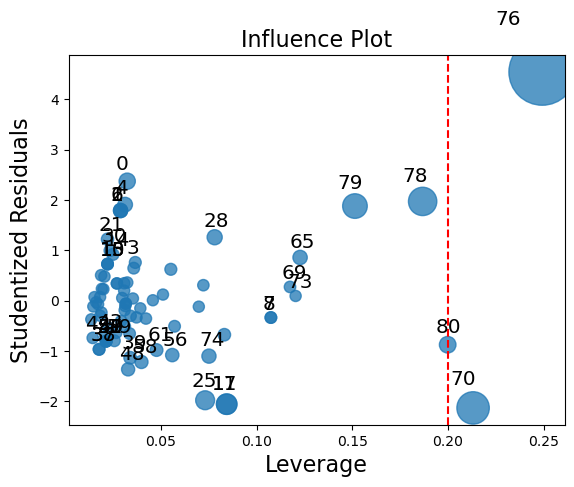

In [25]:
plt.figure(figsize = (15,8))
influence_plot(model_vol , alpha = 0.5)
plt.axvline(x=0.2, color='red', linestyle='--')

<em color='green'><strong> From the above plot, it is evident that data point 70 and 76 are the influencers</em>


In [26]:
df[df.index.isin([70,76])]

,HP,VOL,SP,WT,MPG
70,280,50,164.598513,15.823060,19.678507
76,322,50,169.598513,16.132947,36.900000


In [27]:
df1 = df.drop(df.index[[70,76]] , axis = 0).reset_index()

In [28]:
df1.drop(columns = 'index' , inplace = True)

In [38]:
df1.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


In [30]:
final_m_vol = smf.ols('MPG~HP+SP+VOL' , data = df1).fit()

In [31]:
(final_m_vol.rsquared,final_m_vol.aic,final_m_vol.bic)

(0.8161692010376007, 446.11722639447726, 455.59501780434533)

In [32]:
final_m_wt = smf.ols('MPG~HP+SP+WT' , data = df1).fit()

In [33]:
(final_m_wt.rsquared,final_m_wt.aic,final_m_wt.bic)

(0.8160034320495305, 446.1884323575031, 455.66622376737115)

##### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

In [34]:
model_influence_vol = final_m_vol.get_influence()
(c_V, _) = model_influence_vol.cooks_distance

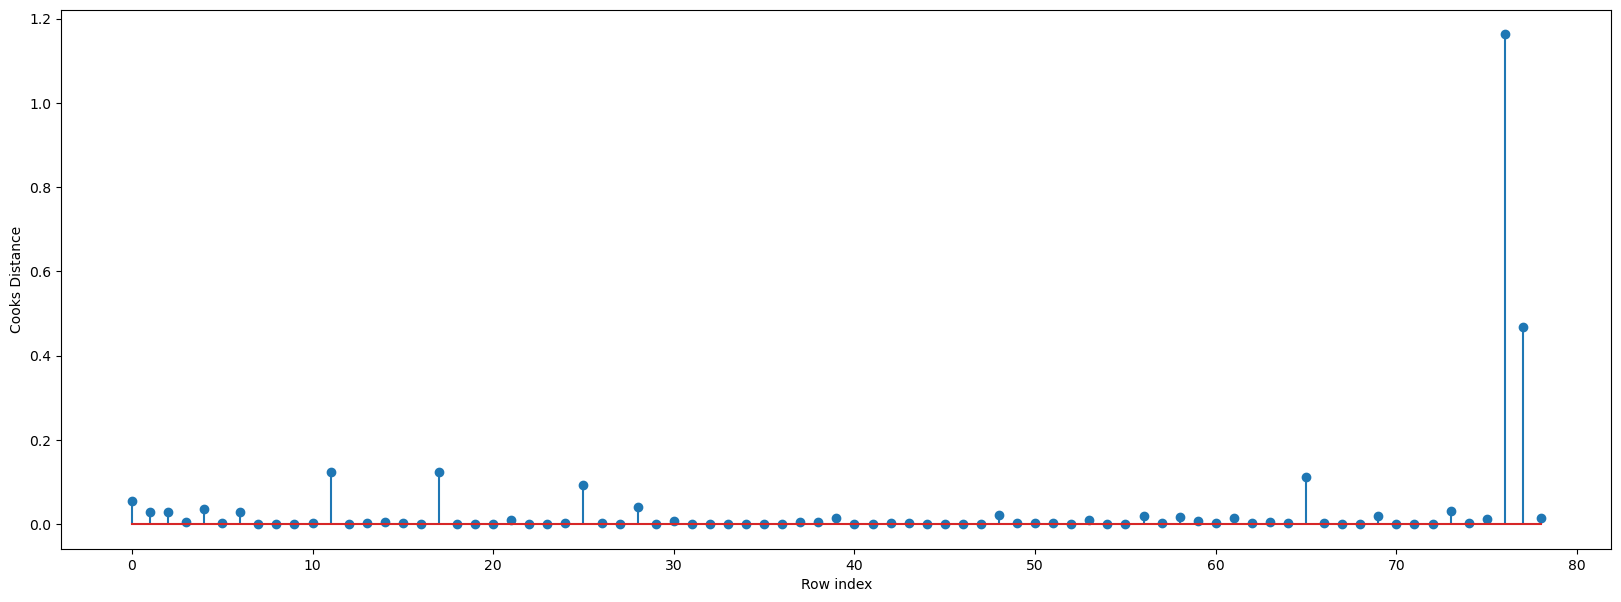

In [35]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');
plt.show()

In [36]:
(np.argmax(c_V) , np.max(c_V))

(76, 1.162938746913518)

In [40]:
df2 = df1.drop(df1.index[[76 , 77]] , axis = 0)

In [41]:
df2.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


In [45]:
final_m_vol = smf.ols('MPG~HP+SP+VOL' , data = df2).fit()

In [47]:
model_influence_V = final_m_vol.get_influence()
(c_V, _) = model_influence_V.cooks_distance

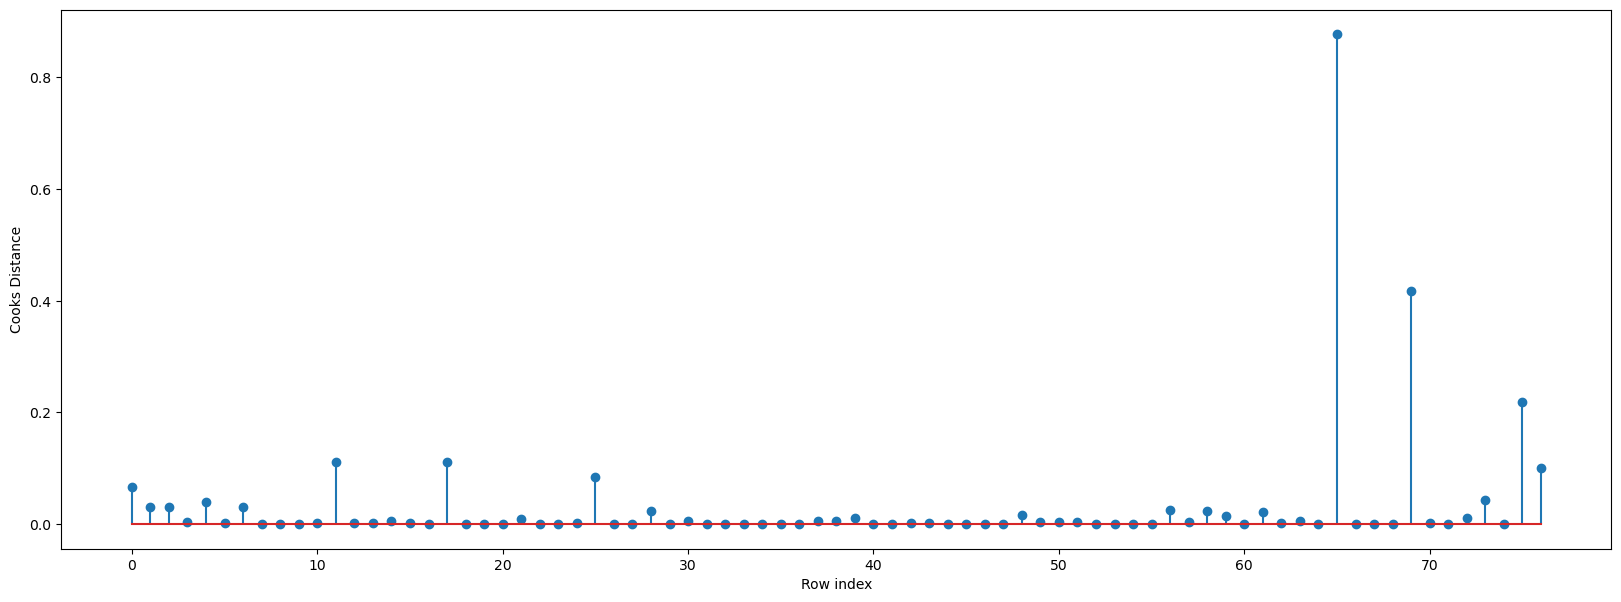

In [48]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df2)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');
plt.show()

In [50]:
(np.argmax(c_V) , np.max(c_V))

(65, 0.8774556986296751)

In [54]:
final_m_vol = smf.ols('MPG~HP+SP+VOL' , data = df2).fit()
(final_m_vol.rsquared,final_m_vol.aic)

(0.8669636111859063, 409.4153062719508)

## Prediction for New Data

In [57]:
new_data = pd.DataFrame(df2 , columns =['VOL','SP','HP'] )

In [58]:
new_data

,VOL,SP,HP
0,89,104.185353,49
1,92,105.461264,55
2,92,105.461264,55
3,92,113.461264,70
4,92,104.461264,53
...,...,...,...
72,160,124.715241,140
73,129,121.864163,140
74,129,132.864163,175
75,115,150.576579,238


In [59]:
pred_v = final_m_vol.predict(new_data)

In [60]:
pred_v

0     45.428872
1     43.992392
2     43.992392
3     43.508150
4     44.085858
        ...    
72    20.679595
73    23.666406
74    19.212878
75    12.198598
78     9.161202
Length: 77, dtype: float64

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
mean_squared_error(df2["MPG"], pred_v)

10.754332851589758